In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pynocular as pn
import numpy as np

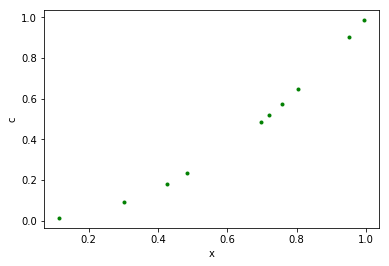

In [2]:
b = pn.PointData()
b['x'] = np.random.rand(10)
b['c'] = b['x']**2
b.plot('x', 'c', 'g.')

Automatic interpolation with respect to x
Automatic interpolation with respect to x
Automatic interpolation with respect to x


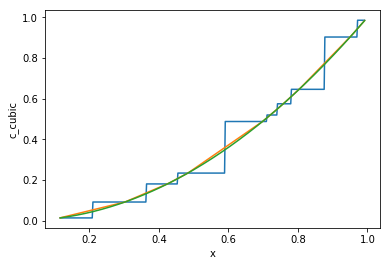

In [3]:
l = pn.PointData()
l['x'] = np.linspace(0,1,500)
l['c_nearest'] = b.interpolate('c', method='nearest')
l['c_linear'] = b.interpolate('c', method='linear')
l['c_cubic'] = b.interpolate('c', method='cubic')
l.plot('x', 'c_nearest')
l.plot('x', 'c_linear')
l.plot('x', 'c_cubic')

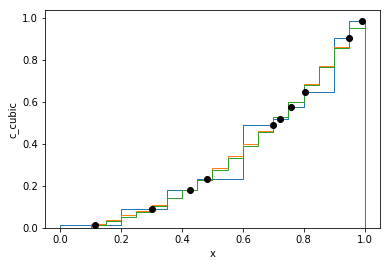

In [5]:
g = pn.GridData()
g.grid['x'].edges = np.linspace(0,1,21)
g['c_nearest'] = b.interpolate('c', method='nearest', fill_value=0)
g['c_linear'] = b.interpolate('c', method='linear', fill_value=0)
g['c_cubic'] = b.interpolate('c', method='cubic', fill_value=0)
b.plot('x', 'c', 'ok')
g.plot_step('c_nearest')
g.plot_step('c_linear')
g.plot_step('c_cubic')

In [6]:
pn.grid

<module 'pynocular.grid' from '/home/peller/pynocular/pynocular/grid.py'>

In [8]:
l['c_win'] = b.window('c', function=np.average, window=[(-0.1,0.1)])
l['c_win_2'] = l.interpolate('c_win', wrt='x', method='linear')
g['c_hist'] = b.histogram('c', function=np.average, fill_value=np.nan)
g['c_hist_2'] = b.histogram('c', function=np.average, fill_value=0)

Automatic with respect to x
(1, 500)


/home/peller/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/peller/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


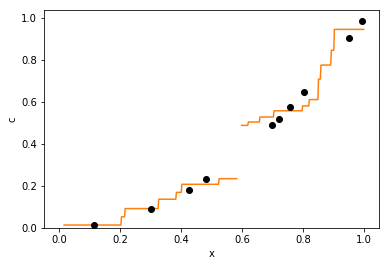

In [10]:
g.plot_step('c_hist')
#g.plot_step('c_hist_i')
#l.plot('x', 'c_win')
l.plot('x', 'c_win_2')
b.plot('x', 'c', 'ok')

In [15]:
g['c_hist_i'] = g.interpolate('c_hist', method='linear')

In [16]:
g['c_hist_i']

array([       nan,        nan, 0.01326865, 0.03282935, 0.05239005,
       0.07195075, 0.09151145, 0.13601635, 0.18052125, 0.23388803,
       0.29733233, 0.36077662, 0.42422092, 0.48766521, 0.51973283,
       0.5748918 , 0.64604216, 0.74558697, 0.84513178, 0.94467659])

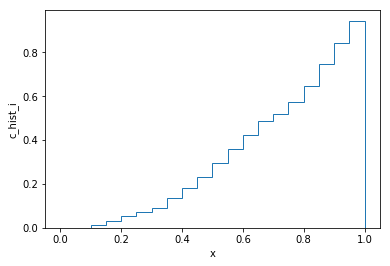

In [28]:
g.plot_step('c_hist_i')


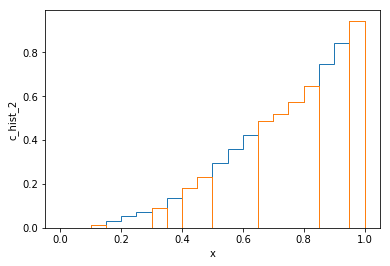

In [29]:
g.plot_step('c_hist_i')
g.plot_step('c_hist_2')